<a href="https://colab.research.google.com/github/YChaudhary1357/StandUpAnalysis/blob/main/DatascienceStandUp_Comedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
transcripts_folder = "/content/drive/MyDrive/colab_transcripts"
os.makedirs(transcripts_folder, exist_ok=True)




In [ ]:
import requests
from bs4 import BeautifulSoup
import os

transcripts_folder = "/content/drive/MyDrive/colab_transcripts"
os.makedirs(transcripts_folder, exist_ok=True)

'''def url_to_transcript(url, comic):
    try:
        page = requests.get(url)
        page.raise_for_status()
        soup = BeautifulSoup(page.content, "lxml")
        if not url.strip():
            print(f"Skipping empty URL for {comic}")
            return None

        response = requests.get(url, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, "html.parser")

        post_content = soup.find("article") or soup.find(class_="post-content") or soup.find("div", class_="entry-content")


        if post_content:
            text = [p.text.strip() for p in post_content.find_all('p')]
            transcript = "\n".join(text)
            print(url)
            filename = f"{comic}.txt"
            file_path = os.path.join(transcripts_folder, filename)
            with open(file_path, "w", encoding="utf-8") as file:
                file.write(transcript)
            print(f'transcript saved to {file_path}')
            return transcript
        else:
            print(f"Error: Could not find 'post-content' on {url}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {url}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
'''
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    container = soup.find("div", class_="site-content")
    text = [p.get_text(strip=True) for p in container.find_all(True)]  # Find all elements inside the container
    transcript = "\n".join(text)
    print(url)
    filename = f"{comic}.txt"
    file_path = os.path.join(transcripts_folder, filename)
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(transcript)
    print(f'transcript saved to {file_path}')
    return transcript

urls = [
    'http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
    'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
    'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
    'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
    'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
    'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
    'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
    'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
    'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
    'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/',
    'https://scrapsfromtheloft.com/movies/matt-rife-lucid-a-crowd-work-special-transcript/',
    'https://scrapsfromtheloft.com/comedy/pete-holmes-i-am-not-for-everyone-transcript/',
    'https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/',
    'https://scrapsfromtheloft.com/comedy/kevin-hart-mark-twain-prize-transcript/',
    'https://scrapsfromtheloft.com/comedy/chris-rock-bigger-blacker-1999-full-transcript/',
    'https://scrapsfromtheloft.com/comedy/russell-peters-deported-transcript/',
    'https://scrapsfromtheloft.com/comedy/trevor-noah-white-house-correspondents-dinner-2022-transcript/',
    'https://scrapsfromtheloft.com/comedy/adam-devine-best-time-of-our-lives-transcript/',
]

comedians = ['louis', 'dave', 'ricky', 'bill', 'jim', 'john', 'ali', 'anthony', 'mike', 'joe', 'matt', 'pete', 'vir', 'kevin', 'chris', 'russell', 'trevor', 'adam']




In [ ]:
transcripts = {}
'''for url, comic in zip(urls, comedians):
    if url:
        transcript = url_to_transcript(url, comic)
        if transcript:
            transcripts[f"{comic}.txt"] = transcript
            print(transcripts[f'{comic}.txt'])
  '''

for url, comic in zip(urls, comedians):
    if url:
        transcript = url_to_transcript(url)
        if transcript:
            transcripts[f"{comic}.txt"] = transcript
            print(transcripts[f'{comic}.txt'])


In [ ]:

for filename in os.listdir(transcripts_folder):
    if filename.endswith('.txt'):
        file_path = os.path.join(transcripts_folder, filename)
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            transcripts[filename] = file.read()

print("Loaded transcripts:", list(transcripts.keys()))


Loaded transcripts: ['louis.txt', 'dave.txt', 'ricky.txt', 'bill.txt', 'jim.txt', 'john.txt', 'ali.txt', 'anthony.txt', 'mike.txt', 'joe.txt', 'matt.txt', 'pete.txt', 'vir.txt', 'kevin.txt', 'chris.txt', 'russell.txt', 'trevor.txt', 'adam.txt']


In [ ]:
import os
import pickle

pickle_folder = "/content/drive/MyDrive/pickle"
os.makedirs(pickle_folder, exist_ok=True)


comedians = ['louis', 'dave', 'ricky', 'bill', 'jim', 'john', 'ali', 'anthony', 'mike', 'joe', 'matt', 'pete', 'vir', 'kevin', 'chris', 'russell', 'trevor', 'adam']

transcripts = {}

for c in comedians:
    transcript_file = os.path.join(transcripts_folder, c + '.txt')
    if os.path.exists(transcript_file):
        with open(transcript_file, 'r', encoding='utf-8', errors='ignore') as file:
            transcripts[c] = file.read()

pickle_file = os.path.join(pickle_folder, 'all_transcripts.pkl')
with open(pickle_file, 'wb') as pickle_out:
    pickle.dump(transcripts, pickle_out)

print("Pickled all transcripts successfully.")

print(transcripts)

In [ ]:
import pickle


pickle_file = '/content/drive/MyDrive/pickle/all_transcripts.pkl'


with open(pickle_file, 'rb') as file:
    data = pickle.load(file)

if isinstance(data, dict):
    print("Loaded data is a dictionary.")
    print("First comedian:", next(iter(data.keys())))
else:
    print("Data is not a dictionary. It is:", type(data))

Loaded data is a dictionary.
First comedian: louis


In [ ]:
print(data)

In [ ]:
print(next(iter(data.keys())))
print(next(iter(data.values())))


louis
COMEDYLouis C.K.: Oh My God (2013) | TranscriptMay 6, 2017'Oh My God' is the fifth comedy special performed by Louis C.K.. It premiered on HBO on April 13, 2013. Filmed in Phoenix, Arizona at the Celebrity TheatreIntroFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.“The Old Lady And The Dog”I live– I live in New York. I always– Like, there’s this o

In [ ]:
def combine_text(list_of_text):
    combined_text = ''.join(list_of_text)
    return combined_text

In [ ]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
adam     COMEDYAdam DeVine: Best Time of Our Lives (2019) – Full TranscriptJune 22, 2019Frenetic comic Adam Devine talks teen awkwardness, celebrity encoun...
ali      COMEDYAli Wong: Baby Cobra (2016) | TranscriptSeptember 19, 2017Ali Wong's stand up special delves into her sexual adventures, hoarding, the rocky...
anthony  COMEDYAnthony Jeselnik: Thoughts And Prayers (2015) – Full TranscriptAugust 3, 2017There's no subject too dark as the comedian skewers taboos and ...
bill     COMEDYBILL BURR: I’M SORRY YOU FEEL THAT WAY (2014) – Full TranscriptMay 24, 2017[cheers and applause] All right, thank you! Thank you very much! ...
chris    COMEDYChris Rock: Bigger & Blacker (1999) – TranscriptNovember 7, 2017Chris Rock brings his critically acclaimed brand of social commentary-themed...
dave     COMEDYDave Chappelle: The Age of Spin (2017) – TranscriptApril 11, 2017The Age of Spin: Dave Chappelle Live at the Hollywood Palladium (2017) Dave...
jim      COMEDYJIM JEFFERIES: BARE (2014) – Full TranscriptApril 21, 2017Nothing is sacred in this show from Australian comic Jim Jefferies, whether it’s t...
joe      COMEDYJoe Rogan: Triggered (2016) – TranscriptAugust 19, 2017Unleashing his inquisitive, intense comedic style, Rogan explores everything from why...
john     COMEDYJohn Mulaney: The Comeback Kid (2015) – TranscriptAugust 2, 2017Armed with boyish charm and a sharp wit, the former "SNL" writer John Mulane...
kevin    COMEDYKevin Hart: The Kennedy Center Mark Twain Prize for American Humor (2024) | TranscriptMay 18, 2024The comedy world gathers to celebrate, and...
louis    COMEDYLouis C.K.: Oh My God (2013) | TranscriptMay 6, 2017'Oh My God' is the fifth comedy special performed by Louis C.K.. It premiered on HBO on ...
matt     MOVIESMatt Rife: Lucid – A Crowd Work Special (2024) | TranscriptAugust 22, 2024Matt Rife’s crowd work special is a hilarious, chaotic mix of roas...
mike     COMEDYMike Birbiglia: My Girlfriend’s Boyfriend (2013) – TranscriptMarch 3, 2018Mike Birbiglia gives his audience a honest insight into his person...
pete     COMEDYPete Holmes: I Am Not for Everyone (2023) | TranscriptFebruary 22, 2024Just over one hour of the awesome stand-up humor from Pete Holmes. He...
ricky    COMEDYRicky Gervais: Humanity (2018) | TranscriptMarch 15, 2018Ricky Gervais examines his own ability to generate controversy in a new Netflix spe...
russell  COMEDYRUSSELL PETERS: DEPORTED (2020) – FULL TRANSCRIPTMay 10, 2020I know it’s going to sound strange, but it’s good to be home. I feel like I don...
trevor   COMEDYTrevor Noah at the White House Correspondents’ Dinner 2022 | TranscriptMay 2, 2022Trevor Noah headlined the annual White House Correspondent...
vir      COMEDYVir Das: Outside in – The Lockdown Special (2020) – TranscriptDecember 17, 2020Stage banter takes on a different — deeper — meaning as the c...

In [ ]:
data_df.transcript.loc['ali']

"COMEDYAli Wong: Baby Cobra (2016) | TranscriptSeptember 19, 2017Ali Wong's stand up special delves into her sexual adventures, hoarding, the rocky road to pregnancy, and why feminism is terribleLadies and gentlemen, please welcome to the stage:Ali Wong!Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of theirmetabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautifulin

In [ ]:
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text.strip()

round1 = lambda x: clean_text_round1(x)

In [ ]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
adam     comedyadam devine best time of our lives  – full transcriptjune   comic adam devine talks teen awkwardness celebrity encounters his pitch perfect ...
ali      comedyali wong baby cobra   transcriptseptember   wongs stand up special delves into her sexual adventures hoarding the rocky road to pregnancy an...
anthony  comedyanthony jeselnik thoughts and prayers  – full transcriptaugust   no subject too dark as the comedian skewers taboos and riffs on national tr...
bill     comedybill burr i’m sorry you feel that way  – full transcriptmay   all right thank you thank you very much thank you thank you thank you how are ...
chris    comedychris rock bigger  blacker  – transcriptnovember   rock brings his critically acclaimed brand of social commentarythemed humor to this  stan...
dave     comedydave chappelle the age of spin  – transcriptapril   age of spin dave chappelle live at the hollywood palladium  dave chappelle gives his usu...
jim      comedyjim jefferies bare  – full transcriptapril   is sacred in this show from australian comic jim jefferies whether it’s the mother of his child...
joe      comedyjoe rogan triggered  – transcriptaugust   his inquisitive intense comedic style rogan explores everything from why no one wants to be a pres...
john     comedyjohn mulaney the comeback kid  – transcriptaugust   with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on...
kevin    comedykevin hart the kennedy center mark twain prize for american humor   transcriptmay   comedy world gathers to celebrate and roast kevin hart a...
louis    comedylouis ck oh my god   transcriptmay   my god is the fifth comedy special performed by louis ck it premiered on hbo on april   filmed in phoen...
matt     moviesmatt rife lucid – a crowd work special   transcriptaugust   rife’s crowd work special is a hilarious chaotic mix of roasts wild audience sto...
mike     comedymike birbiglia my girlfriend’s boyfriend  – transcriptmarch   birbiglia gives his audience a honest insight into his personal experiences ov...
pete     comedypete holmes i am not for everyone   transcriptfebruary   over one hour of the awesome standup humor from pete holmes he discusses sex toys t...
ricky    comedyricky gervais humanity   transcriptmarch   gervais examines his own ability to generate controversy in a new netflix specialhello hello how ...
russell  comedyrussell peters deported  – full transcriptmay   know it’s going to sound strange but it’s good to be home i feel like i don’t have to do thi...
trevor   comedytrevor noah at the white house correspondents’ dinner   transcriptmay   noah headlined the annual white house correspondents’ association di...
vir      comedyvir das outside in – the lockdown special  – transcriptdecember   banter takes on a different — deeper — meaning as the comedian performs on...

In [ ]:
def clean_text_round2(text):
    text = re.sub(r'[‘’“”…]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', ' ', text)
    text=text.lower()
    return text.strip()
round2 = lambda x: clean_text_round2(x)

In [ ]:
data_clean=pd.DataFrame(data_clean.transcript.apply(round2))
data_clean


transcript
adam     comedyadam devine best time of our lives  – full transcriptjune   comic adam devine talks teen awkwardness celebrity encounters his pitch perfect ...
ali      comedyali wong baby cobra   transcriptseptember   wongs stand up special delves into her sexual adventures hoarding the rocky road to pregnancy an...
anthony  comedyanthony jeselnik thoughts and prayers  – full transcriptaugust   no subject too dark as the comedian skewers taboos and riffs on national tr...
bill     comedybill burr im sorry you feel that way  – full transcriptmay   all right thank you thank you very much thank you thank you thank you how are y...
chris    comedychris rock bigger  blacker  – transcriptnovember   rock brings his critically acclaimed brand of social commentarythemed humor to this  stan...
dave     comedydave chappelle the age of spin  – transcriptapril   age of spin dave chappelle live at the hollywood palladium  dave chappelle gives his usu...
jim      comedyjim jefferies bare  – full transcriptapril   is sacred in this show from australian comic jim jefferies whether its the mother of his child ...
joe      comedyjoe rogan triggered  – transcriptaugust   his inquisitive intense comedic style rogan explores everything from why no one wants to be a pres...
john     comedyjohn mulaney the comeback kid  – transcriptaugust   with boyish charm and a sharp wit the former snl writer john mulaney offers sly takes on...
kevin    comedykevin hart the kennedy center mark twain prize for american humor   transcriptmay   comedy world gathers to celebrate and roast kevin hart a...
louis    comedylouis ck oh my god   transcriptmay   my god is the fifth comedy special performed by louis ck it premiered on hbo on april   filmed in phoen...
matt     moviesmatt rife lucid – a crowd work special   transcriptaugust   rifes crowd work special is a hilarious chaotic mix of roasts wild audience stor...
mike     comedymike birbiglia my girlfriends boyfriend  – transcriptmarch   birbiglia gives his audience a honest insight into his personal experiences ove...
pete     comedypete holmes i am not for everyone   transcriptfebruary   over one hour of the awesome standup humor from pete holmes he discusses sex toys t...
ricky    comedyricky gervais humanity   transcriptmarch   gervais examines his own ability to generate controversy in a new netflix specialhello hello how ...
russell  comedyrussell peters deported  – full transcriptmay   know its going to sound strange but its good to be home i feel like i dont have to do things...
trevor   comedytrevor noah at the white house correspondents dinner   transcriptmay   noah headlined the annual white house correspondents association dinn...
vir      comedyvir das outside in – the lockdown special  – transcriptdecember   banter takes on a different — deeper — meaning as the comedian performs on...

In [ ]:
data_clean.head()

transcript
adam     comedyadam devine best time of our lives  – full transcriptjune   comic adam devine talks teen awkwardness celebrity encounters his pitch perfect ...
ali      comedyali wong baby cobra   transcriptseptember   wongs stand up special delves into her sexual adventures hoarding the rocky road to pregnancy an...
anthony  comedyanthony jeselnik thoughts and prayers  – full transcriptaugust   no subject too dark as the comedian skewers taboos and riffs on national tr...
bill     comedybill burr im sorry you feel that way  – full transcriptmay   all right thank you thank you very much thank you thank you thank you how are y...
chris    comedychris rock bigger  blacker  – transcriptnovember   rock brings his critically acclaimed brand of social commentarythemed humor to this  stan...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import pickle

data_clean.to_pickle('data_clean.pkl')

cv = CountVectorizer(stop_words='english',min_df=0.001, max_df=1.0)
data_cv =cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

aaaaah  aaah  aah  ababy  abarbiedoll  abbott  abbottis  abby  abc  \
adam          0     0   33      0            0       0         0     0    0   
ali           0     0    0      0            0       0         0     0   11   
anthony       0     0    0     11           11       0         0     0    0   
bill         11     0    0      0            0       0         0     0    0   
chris         0     0    0      0            0       0         0     0    0   
dave          0    11    0      0            0       0         0     0    0   
jim           0     0    0      0            0       0         0     0    0   
joe           0     0    0      0            0       0         0     0    0   
john          0     0    0      0            0       0         0     0    0   
kevin         0     0    0      0            0       0         0     0    0   
louis         0     0   33      0            0       0         0     0    0   
matt          0     0    0      0            0       0         0     0    0   
mike          0     0    0      0            0       0         0     0    0   
pete          0     0    0      0            0       0         0     0    0   
ricky         0     0    0      0            0       0         0     0    0   
russell       0     0    0      0            0       0         0     0    0   
trevor        0     0    0      0            0       1        11    11    0   
vir           0     0    0      0            0       0         0     0    0   

         abcs  ...  zombies  zone  zones  zoning  zoo  zoologist  zoom  zoos  \
adam        0  ...        0     0     11       0    0          0     0     0   
ali         0  ...        0     0      0       0    0          0     0     0   
anthony     0  ...        0     0      0       0    0          0     0     0   
bill       11  ...       11     0      0      11    0          0     0     0   
chris       0  ...        0     0      0       0    0          0     0     0   
dave        0  ...        0     0      0       0    0          0     0     0   
jim         0  ...        0     0      0       0    0          0     0     0   
joe         0  ...        0     0      0       0    0          0     0     0   
john        0  ...        0     0      0       0    0          0     0     0   
kevin       0  ...        0    11      0       0    0          0     0     0   
louis       0  ...        0     0      0       0    0          0     0     0   
matt        0  ...        0     0      0       0    0          0     0     0   
mike        0  ...        0     0      0       0    0          0     0     0   
pete        0  ...        0     0      0       0    0         11    11    11   
ricky       0  ...        0     0      0       0   11          0     0     0   
russell     0  ...        0     0      0       0    0          0     0     0   
trevor      0  ...        0     0      0       0    0          0     0     0   
vir         0  ...        0     0      0       0    0          0    66     0   

         zucker  éclair  
adam          0       0  
ali           0       0  
anthony       0       0  
bill          0       0  
chris         0       0  
dave          0       0  
jim           0       0  
joe           0       0  
john          0      11  
kevin         0       0  
louis         0       0  
matt          0       0  
mike          0       0  
pete          0       0  
ricky         0       0  
russell       0       0  
trevor       12       0  
vir           0       0  

[18 rows x 11548 columns]

In [ ]:
data_dtm.to_pickle("corpus.pkl")

In [ ]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data = data.transpose()
data.head()

adam  ali  anthony  bill  chris  dave  jim  joe  john  kevin  \
aaaaah          0    0        0    11      0     0    0    0     0      0   
aaah            0    0        0     0      0    11    0    0     0      0   
aah            33    0        0     0      0     0    0    0     0      0   
ababy           0    0       11     0      0     0    0    0     0      0   
abarbiedoll     0    0       11     0      0     0    0    0     0      0   

             louis  matt  mike  pete  ricky  russell  trevor  vir  
aaaaah           0     0     0     0      0        0       0    0  
aaah             0     0     0     0      0        0       0    0  
aah             33     0     0     0      0        0       0    0  
ababy            0     0     0     0      0        0       0    0  
abarbiedoll      0     0     0     0      0        0       0    0

In [ ]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

print(top_dict)

{'adam': [('like', 3282), ('im', 1123), ('know', 957), ('just', 803), ('right', 627), ('youre', 616), ('guys', 561), ('thats', 551), ('fuck', 418), ('man', 397), ('yeah', 374), ('dont', 352), ('cause', 352), ('theyre', 352), ('time', 352), ('shit', 319), ('didnt', 275), ('got', 253), ('hes', 253), ('good', 253), ('theres', 242), ('gonna', 242), ('guy', 242), ('cool', 231), ('say', 231), ('stupid', 221), ('ass', 220), ('weird', 220), ('little', 220), ('life', 213)], 'ali': [('like', 1380), ('im', 775), ('just', 704), ('know', 698), ('dont', 672), ('thats', 374), ('shit', 364), ('youre', 341), ('gonna', 297), ('ok', 286), ('lot', 265), ('wanna', 231), ('oh', 231), ('husband', 221), ('gotta', 220), ('time', 209), ('right', 209), ('cause', 198), ('got', 188), ('women', 187), ('day', 187), ('people', 156), ('pregnant', 156), ('need', 154), ('god', 154), ('hes', 154), ('tell', 143), ('yeah', 143), ('dude', 132), ('work', 132)], 'anthony': [('im', 641), ('like', 555), ('joke', 431), ('know', 

In [ ]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

adam
like, im, know, just, right, youre, guys, thats, fuck, man, yeah, dont, cause, theyre
---
ali
like, im, just, know, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, husband
---
anthony
im, like, joke, know, dont, got, just, thats, said, anthony, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
chris
got, thats, shit, dont, man, right, fuck, like, aint, know, just, women, gonna, fucking
---
dave
like, know, said, just, im, shit, people, ahah, didnt, dont, time, thats, fuck, fucking
---
jim
like, im, dont, right, fucking, know, just, went, youre, people, thats, oh, day, going
---
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, im, clinton, thats, right, youre, time, little, hey, got
---
kevin
kevin, love, like, know, dont, im, gonna, right, man, got, hart, said, just, little
---
louis
like, just, know, dont, thats, im, you

In [ ]:
from collections import Counter
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

print(words)
print(len(words))

['like', 'im', 'know', 'just', 'right', 'youre', 'guys', 'thats', 'fuck', 'man', 'yeah', 'dont', 'cause', 'theyre', 'time', 'shit', 'didnt', 'got', 'hes', 'good', 'theres', 'gonna', 'guy', 'cool', 'say', 'stupid', 'ass', 'weird', 'little', 'life', 'like', 'im', 'just', 'know', 'dont', 'thats', 'shit', 'youre', 'gonna', 'ok', 'lot', 'wanna', 'oh', 'husband', 'gotta', 'time', 'right', 'cause', 'got', 'women', 'day', 'people', 'pregnant', 'need', 'god', 'hes', 'tell', 'yeah', 'dude', 'work', 'im', 'like', 'joke', 'know', 'dont', 'got', 'just', 'thats', 'said', 'anthony', 'day', 'say', 'guys', 'people', 'tell', 'right', 'grandma', 'jokes', 'youre', 'time', 'think', 'okay', 'good', 'thing', 'did', 'school', 'ive', 'gonna', 'baby', 'yeah', 'like', 'just', 'right', 'im', 'know', 'dont', 'gonna', 'got', 'fucking', 'yeah', 'shit', 'youre', 'thats', 'dude', 'fuck', 'think', 'want', 'people', 'did', 'hes', 'guy', 'didnt', 'make', 'come', 'thing', 'going', 'theyre', 'let', 'theres', 'little', 'got

In [ ]:
print(Counter(words).most_common())
print(len(Counter(words).most_common()))

[('like', 18), ('im', 18), ('know', 18), ('just', 18), ('right', 18), ('thats', 18), ('dont', 18), ('youre', 17), ('got', 17), ('people', 17), ('gonna', 14), ('yeah', 12), ('good', 11), ('think', 11), ('time', 10), ('shit', 10), ('cause', 9), ('hes', 9), ('theres', 9), ('really', 9), ('fuck', 8), ('didnt', 8), ('say', 8), ('said', 8), ('going', 8), ('man', 7), ('theyre', 7), ('thing', 7), ('fucking', 7), ('want', 7), ('guys', 6), ('little', 6), ('oh', 6), ('day', 6), ('did', 6), ('guy', 4), ('dude', 4), ('ive', 4), ('make', 4), ('went', 4), ('life', 3), ('ok', 3), ('wanna', 3), ('women', 3), ('need', 3), ('tell', 3), ('joke', 3), ('okay', 3), ('come', 3), ('kids', 3), ('goes', 3), ('real', 3), ('way', 3), ('lot', 2), ('gotta', 2), ('baby', 2), ('white', 2), ('black', 2), ('kevin', 2), ('fck', 2), ('house', 2), ('old', 2), ('love', 2), ('id', 2), ('mean', 2), ('ill', 2), ('actually', 2), ('cool', 1), ('stupid', 1), ('ass', 1), ('weird', 1), ('husband', 1), ('pregnant', 1), ('god', 1), (

In [ ]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
print(add_stop_words)
print(len(add_stop_words))

['like', 'im', 'know', 'just', 'right', 'thats', 'dont', 'youre', 'got', 'people', 'gonna', 'yeah', 'good', 'think', 'time', 'shit', 'cause', 'hes', 'theres', 'really', 'fuck', 'didnt', 'say', 'said', 'going', 'man', 'theyre', 'thing', 'fucking', 'want']
30


In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pickle

data_clean = pd.read_pickle('data_clean.pkl')

cv = CountVectorizer(stop_words='english',min_df=0.01,max_df=1.0)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index


pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stop_words=set(STOPWORDS)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names =[
    "Louis C.K.",
    "Dave Chappelle",
    "Ricky Gervais",
    "Bill Burr",
        "Jim Carrey",
      "John Mulaney",
      "Ali Wong",
    "Anthony Jeselnik",
    "Mike Epps",
    "Joe Rogan",
    "Matt Rife",
    "Pete Davidson",
    "Vir Das",
    "Kevin Hart",
    "Chris Rock",
    "Russell Peters",
    "Trevor Noah",
    "Adam Sandler"
]

for index, comedian in enumerate(data.columns[:18]):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(3,5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

In [ ]:
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
16       Trevor Noah          1172
2      Ricky Gervais          1205
10         Matt Rife          1248
4         Jim Carrey          1272
0         Louis C.K.          1361
15    Russell Peters          1367
11     Pete Davidson          1447
6           Ali Wong          1455
17      Adam Sandler          1474
1     Dave Chappelle          1529
8          Mike Epps          1568
5       John Mulaney          1597
7   Anthony Jeselnik          1634
12           Vir Das          1647
13        Kevin Hart          1717
3          Bill Burr          1739
14        Chris Rock          1796
9          Joe Rogan          2635

In [ ]:
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

run_times = [65, 64, 85, 65, 72, 78, 82, 68, 67, 63, 81, 84, 70, 75, 77, 73, 80, 79]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

comedian  unique_words  total_words  run_times  words_per_minute
16       Trevor Noah          1172        24138         80        301.725000
2      Ricky Gervais          1205        34768         85        409.035294
10         Matt Rife          1248        38502         81        475.333333
11     Pete Davidson          1447        41501         84        494.059524
17      Adam Sandler          1474        39810         79        503.924051
1     Dave Chappelle          1529        37900         64        592.187500
5       John Mulaney          1597        46908         78        601.384615
4         Jim Carrey          1272        44797         72        622.180556
13        Kevin Hart          1717        49440         75        659.200000
6           Ali Wong          1455        54211         82        661.109756
8          Mike Epps          1568        46150         67        688.805970
0         Louis C.K.          1361        46860         65        720.923077
14        Chris Rock          1796        56645         77        735.649351
15    Russell Peters          1367        54594         73        747.863014
7   Anthony Jeselnik          1634        52286         68        768.911765
12           Vir Das          1647        54083         70        772.614286
9          Joe Rogan          2635        52681         63        836.206349
3          Bill Burr          1739        62917         65        967.953846

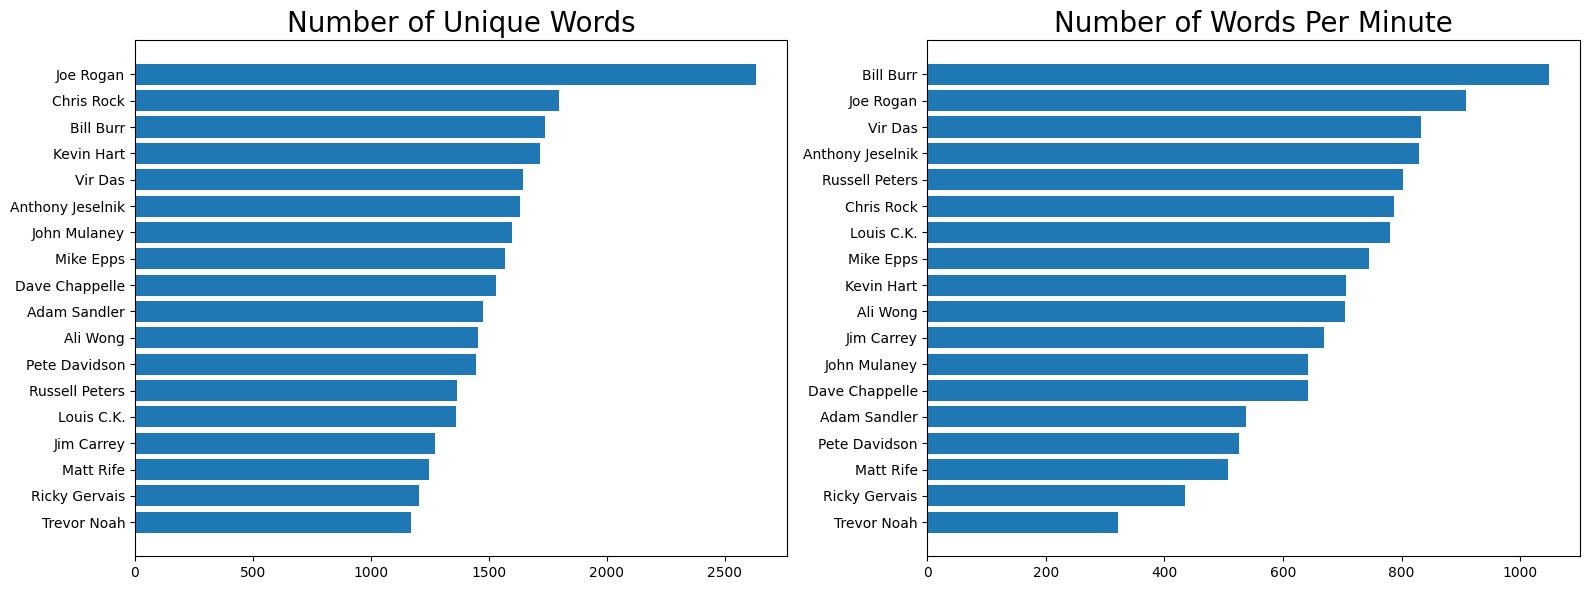

In [ ]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
Counter(words).most_common()

[('like', 18),
 ('im', 18),
 ('know', 18),
 ('just', 18),
 ('right', 18),
 ('thats', 18),
 ('dont', 18),
 ('youre', 17),
 ('got', 17),
 ('people', 17),
 ('gonna', 14),
 ('yeah', 12),
 ('good', 11),
 ('think', 11),
 ('time', 10),
 ('shit', 10),
 ('cause', 9),
 ('hes', 9),
 ('theres', 9),
 ('really', 9),
 ('fuck', 8),
 ('didnt', 8),
 ('say', 8),
 ('said', 8),
 ('going', 8),
 ('man', 7),
 ('theyre', 7),
 ('thing', 7),
 ('fucking', 7),
 ('want', 7),
 ('guys', 6),
 ('little', 6),
 ('oh', 6),
 ('day', 6),
 ('did', 6),
 ('guy', 4),
 ('dude', 4),
 ('ive', 4),
 ('make', 4),
 ('went', 4),
 ('life', 3),
 ('ok', 3),
 ('wanna', 3),
 ('women', 3),
 ('need', 3),
 ('tell', 3),
 ('joke', 3),
 ('okay', 3),
 ('come', 3),
 ('kids', 3),
 ('goes', 3),
 ('real', 3),
 ('way', 3),
 ('lot', 2),
 ('gotta', 2),
 ('baby', 2),
 ('white', 2),
 ('black', 2),
 ('kevin', 2),
 ('fck', 2),
 ('house', 2),
 ('old', 2),
 ('love', 2),
 ('id', 2),
 ('mean', 2),
 ('ill', 2),
 ('actually', 2),
 ('cool', 1),
 ('stupid', 1),
 ('a

In [ ]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
adam        627     319
ali         176     364
anthony     166      99
bill       1183     710
chris      1112     968
dave        708     485
jim        1265     220
joe           0     420
john         44      66
kevin       314     187
louis       231     255
matt        463     132
mike          0       0
pete        176     122
ricky       660      66
russell     693     286
trevor        0       0
vir           0     200

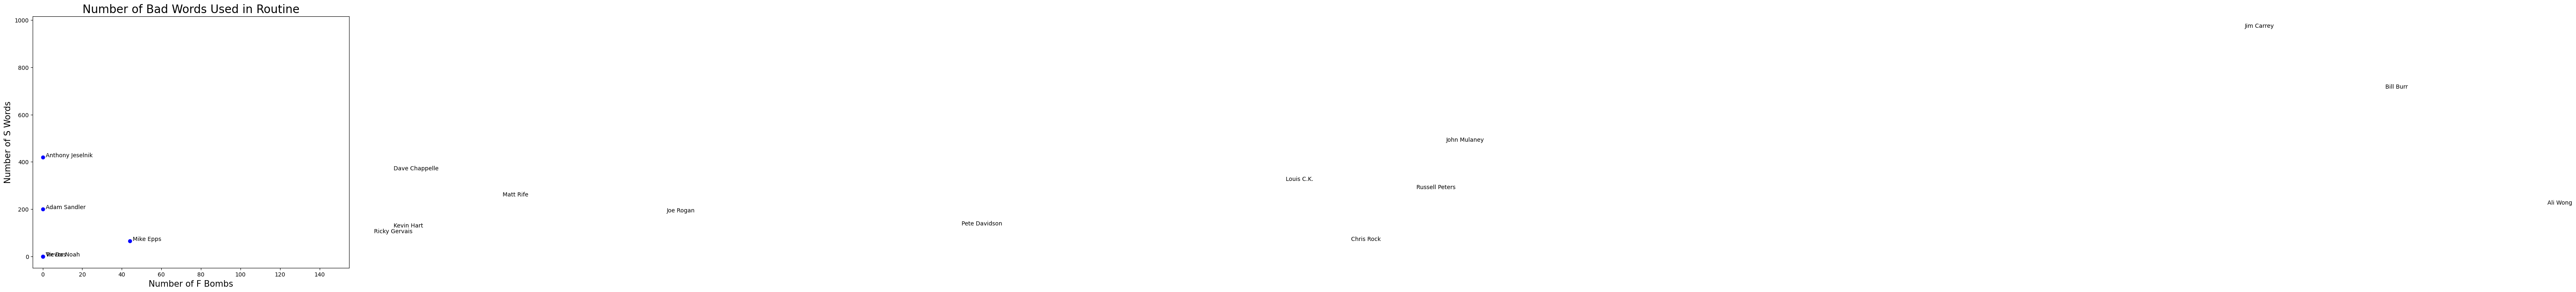

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()